In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import sys
sys.path.append('../src')
import plots

In [2]:
df_movies = pd.read_csv('../data/zee-movies.dat', encoding='latin-1', sep='::')
df_users = pd.read_csv('../data/zee-users.dat', encoding='latin-1', sep='::')
df_ratings = pd.read_csv('../data/zee-ratings.dat', encoding='latin-1', sep='::')

In [3]:
df_movies.info(), df_users.info(), df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Movie ID  3883 non-null   int64 
 1   Title     3883 non-null   object
 2   Genres    3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UserID      6040 non-null   int64 
 1   Gender      6040 non-null   object
 2   Age         6040 non-null   int64 
 3   Occupation  6040 non-null   int64 
 4   Zip-code    6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   UserID     1000209

(None, None, None)

In [4]:
df_movies.head()

,Movie ID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
df_movies.shape

(3883, 3)

In [6]:
df_ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [7]:
df_ratings.shape

(1000209, 4)

In [8]:
df_users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [9]:
df_users.shape

(6040, 5)

In [10]:
def seperate(x):
  x = x.rsplit("(", 1)
  x[1] = x[1].replace(")", "")
  x[0] = x[0].strip()
  x[1] = x[1].strip()
  return x
df_movies["title"], df_movies["year"] = zip(*df_movies["Title"].apply(seperate))

In [11]:
df_movies.head(2)

,Movie ID,Title,Genres,title,year
0,1,Toy Story (1995),Animation|Children's|Comedy,Toy Story,1995
1,2,Jumanji (1995),Adventure|Children's|Fantasy,Jumanji,1995


In [12]:
df_movies.drop('Title', axis=1, inplace=True)
df_movies.rename(columns={'Movie ID': 'MovieID'}, inplace=True)

In [13]:
df_movies.columns

Index(['MovieID', 'Genres', 'title', 'year'], dtype='object')

In [14]:
df_ratings.columns

Index(['UserID', 'MovieID', 'Rating', 'Timestamp'], dtype='object')

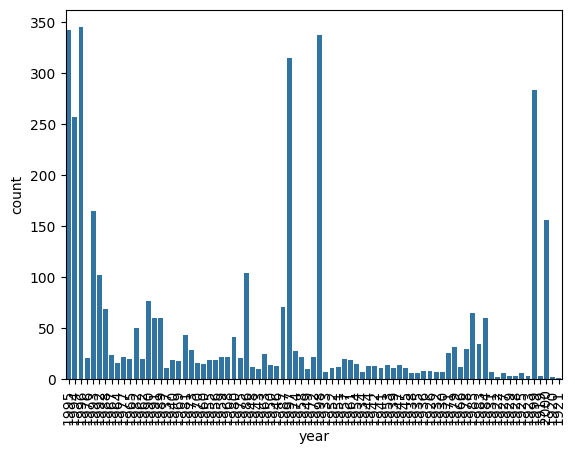

In [15]:
sns.countplot(df_movies, x ='year')
plt.xticks(rotation=90)
plt.show()

In [16]:
df_movies["year"].unique()

array(['1995', '1994', '1996', '1976', '1993', '1992', '1988', '1967',
       '1964', '1977', '1965', '1982', '1962', '1990', '1991', '1989',
       '1937', '1940', '1969', '1981', '1973', '1970', '1960', '1955',
       '1956', '1959', '1968', '1980', '1975', '1986', '1948', '1943',
       '1963', '1950', '1946', '1987', '1997', '1974', '1958', '1949',
       '1972', '1998', '1933', '1952', '1951', '1957', '1961', '1954',
       '1934', '1944', '1942', '1941', '1953', '1939', '1947', '1945',
       '1938', '1935', '1936', '1926', '1932', '1930', '1971', '1979',
       '1966', '1978', '1985', '1983', '1984', '1931', '1922', '1927',
       '1929', '1928', '1925', '1923', '1999', '1919', '2000', '1920',
       '1921'], dtype=object)

In [17]:
df_movies["year"].value_counts()[:10]

year
1996    345
1995    342
1998    337
1997    315
1999    283
1994    257
1993    165
2000    156
1986    104
1992    102
Name: count, dtype: int64

In [18]:
df_movies_copy = df_movies.copy(deep=True)
df_movies_copy["Genres"] = df_movies_copy["Genres"].str.split("|")
df_movies_copy.head()

,MovieID,Genres,title,year
0,1,"[Animation, Children's, Comedy]",Toy Story,1995
1,2,"[Adventure, Children's, Fantasy]",Jumanji,1995
2,3,"[Comedy, Romance]",Grumpier Old Men,1995
3,4,"[Comedy, Drama]",Waiting to Exhale,1995
4,5,[Comedy],Father of the Bride Part II,1995


In [19]:
df_movies_copy = df_movies_copy.explode("Genres")

In [20]:
df_movies_copy.head()

,MovieID,Genres,title,year
0,1,Animation,Toy Story,1995
0,1,Children's,Toy Story,1995
0,1,Comedy,Toy Story,1995
1,2,Adventure,Jumanji,1995
1,2,Children's,Jumanji,1995


In [21]:
# df_movies_copy["Genres"].value_counts()

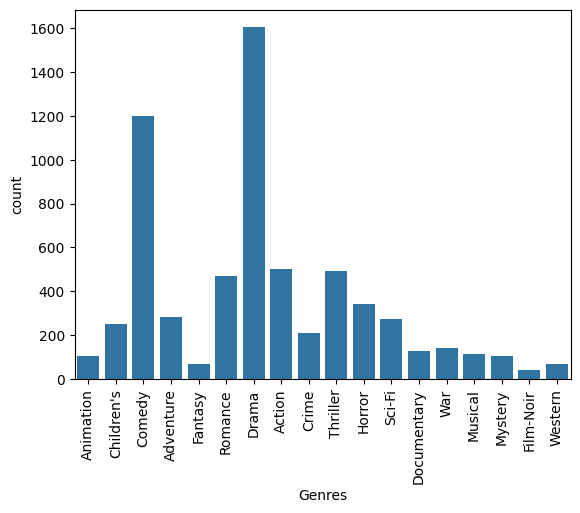

In [22]:
sns.countplot(df_movies_copy, x ='Genres')
plt.xticks(rotation=90)
plt.show()

In [23]:
df_ratings.columns

Index(['UserID', 'MovieID', 'Rating', 'Timestamp'], dtype='object')

In [24]:
from datetime import datetime
df_ratings["year_rated"] = df_ratings['Timestamp'].apply(lambda x: datetime.fromtimestamp(x).year)
df_ratings["month_rated"] = df_ratings['Timestamp'].apply(lambda x: datetime.fromtimestamp(x).month)


In [25]:
df_ratings.drop('Timestamp', axis=1, inplace=True)

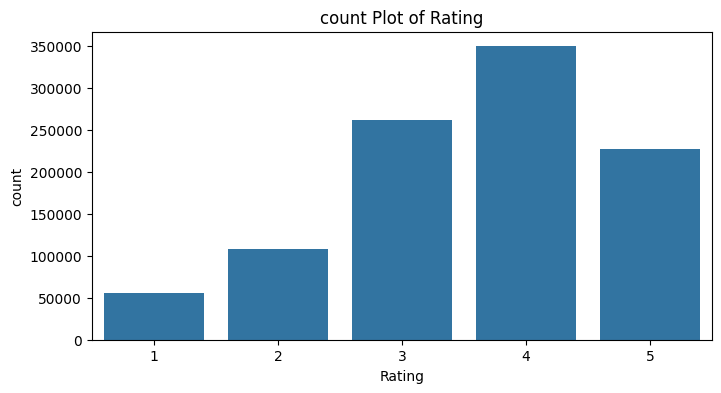

In [26]:
plots.plot_count_column(df_ratings, 'Rating')

In [27]:
df_ratings.head()

,UserID,MovieID,Rating,year_rated,month_rated
0,1,1193,5,2001,1
1,1,661,3,2001,1
2,1,914,3,2001,1
3,1,3408,4,2001,1
4,1,2355,5,2001,1


In [28]:
df_users.columns

Index(['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'], dtype='object')

In [29]:
df_users["Gender"] = df_users["Gender"].map({"F":0, "M":1})

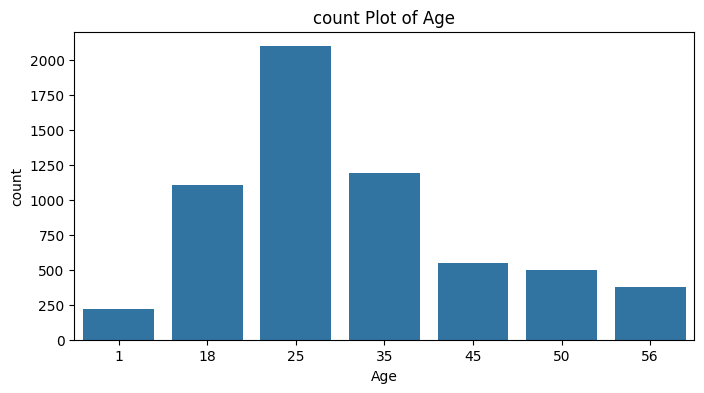

In [30]:
plots.plot_count_column(df_users, 'Age')

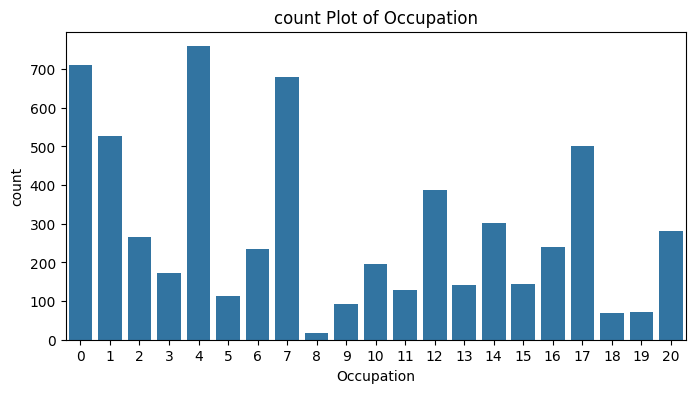

In [31]:
plots.plot_count_column(df_users, 'Occupation')

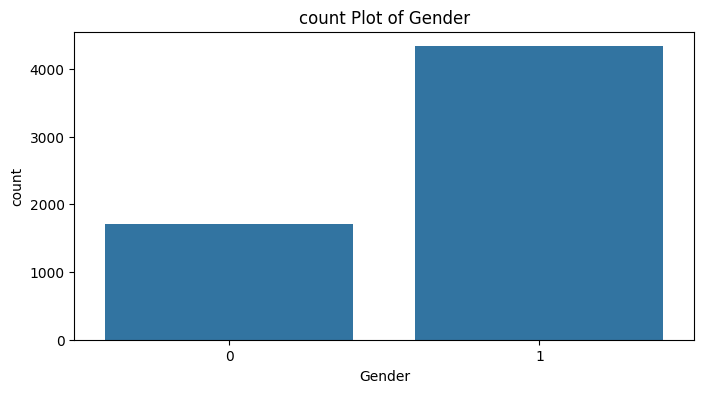

In [32]:
plots.plot_count_column(df_users, 'Gender')

In [33]:
df_1 = pd.merge(df_movies, df_ratings, how='inner',on='MovieID')
df_1.head()

,MovieID,Genres,title,year,UserID,Rating,year_rated,month_rated
0,1,Animation|Children's|Comedy,Toy Story,1995,1,5,2001,1
1,1,Animation|Children's|Comedy,Toy Story,1995,6,4,2000,12
2,1,Animation|Children's|Comedy,Toy Story,1995,8,4,2000,12
3,1,Animation|Children's|Comedy,Toy Story,1995,9,5,2000,12
4,1,Animation|Children's|Comedy,Toy Story,1995,10,5,2000,12


In [34]:
df_2 = pd.merge(df_1, df_users, how='inner', on='UserID')
df_2.head()

,MovieID,Genres,title,year,UserID,Rating,year_rated,month_rated,Gender,Age,Occupation,Zip-code
0,1,Animation|Children's|Comedy,Toy Story,1995,1,5,2001,1,0,1,10,48067
1,1,Animation|Children's|Comedy,Toy Story,1995,6,4,2000,12,0,50,9,55117
2,1,Animation|Children's|Comedy,Toy Story,1995,8,4,2000,12,1,25,12,11413
3,1,Animation|Children's|Comedy,Toy Story,1995,9,5,2000,12,1,25,17,61614
4,1,Animation|Children's|Comedy,Toy Story,1995,10,5,2000,12,0,35,1,95370


In [35]:
df = df_2.copy(deep=True)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 12 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   MovieID      1000209 non-null  int64 
 1   Genres       1000209 non-null  object
 2   title        1000209 non-null  object
 3   year         1000209 non-null  object
 4   UserID       1000209 non-null  int64 
 5   Rating       1000209 non-null  int64 
 6   year_rated   1000209 non-null  int64 
 7   month_rated  1000209 non-null  int64 
 8   Gender       1000209 non-null  int64 
 9   Age          1000209 non-null  int64 
 10  Occupation   1000209 non-null  int64 
 11  Zip-code     1000209 non-null  object
dtypes: int64(8), object(4)
memory usage: 91.6+ MB


In [43]:
df_1 = pd.merge(df_movies_copy, df_ratings, how='inner',on='MovieID')
df_2 = pd.merge(df_1, df_users, how='inner', on='UserID')
df_expand = df_2.copy(deep=True)

In [44]:
df_expand.head()

,MovieID,Genres,title,year,UserID,Rating,year_rated,month_rated,Gender,Age,Occupation,Zip-code
0,1,Animation,Toy Story,1995,1,5,2001,1,0,1,10,48067
1,1,Animation,Toy Story,1995,6,4,2000,12,0,50,9,55117
2,1,Animation,Toy Story,1995,8,4,2000,12,1,25,12,11413
3,1,Animation,Toy Story,1995,9,5,2000,12,1,25,17,61614
4,1,Animation,Toy Story,1995,10,5,2000,12,0,35,1,95370


In [45]:
df_expand.to_csv("../data/expanded.csv", index=False)

In [37]:
df_movies.to_csv("../data/movies.csv", index=False)


In [38]:
df_users.to_csv("../data/users.csv", index=False)

In [39]:
df_ratings.to_csv("../data/ratings.csv", index=False)

In [40]:
df_movies_copy.to_csv("../data/movies_copy.csv", index=False)

In [41]:
df.to_csv("../data/merged.csv", index=False)